In [2]:


import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.io import fits
from astropy.table import Table
from astropy.time import Time
%matplotlib inline
from matplotlib.colors import LogNorm
import pandas as pd

from fits_align.ident import make_transforms
from fits_align.align import affineremap
from glob import glob

from astropy.modeling.models import Gaussian2D
from photutils.datasets import make_noise_image
from photutils.isophote import EllipseGeometry
from photutils.aperture import EllipticalAperture


In [4]:
tmp_dir = r"isya2024\Roger Hajjar\NGC7793\NGC7793 B\lco_data-20240926-14"

img_list = sorted(glob(os.path.join(tmp_dir,"*-e91.fits.fz")))
ref_image = img_list[0]
images_to_align = img_list[1:]

identifications = make_transforms(ref_image, images_to_align)

In [5]:
aligned_images = [ref_image]
for id in identifications:
    if id.ok:
        alignedimg = affineremap(id.ukn.filepath, id.trans, outdir=tmp_dir)
        aligned_images.append(alignedimg)
        print(alignedimg)

for i in range(1, len(aligned_images)+1):
    if i==1:
        fits_file = fits.open(aligned_images[i-1])
        print(fits_file[1].data.shape)
    else:
        fits_file = fits.open(aligned_images[i-1])
        print(fits_file[0].data.shape)


isya2024\Roger Hajjar\NGC7793\NGC7793 B\lco_data-20240926-14\lsc0m409-kb29-20201201-0141-e91.fits_affineremap.fits


PermissionError: [WinError 32] Le processus ne peut pas accéder au fichier car ce fichier est utilisé par un autre processus: 'isya2024\\Roger Hajjar\\NGC7793\\NGC7793 B\\lco_data-20240926-14\\lsc0m409-kb29-20201201-0144-e91.fits_affineremap.fits'

In [6]:
file_fits = r'C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 B\lco_data-20240926-14\lsc0m412-kb26-20190731-0291-e91.fits_affineremap.fits'
hd189733_image = fits.open(file_fits)
hd_imdata = hd189733_image[0].data
print(np.min(hd_imdata), np.max(hd_imdata), np.mean(hd_imdata), np.median(hd_imdata), np.std(hd_imdata))


-8110.512 59048.184 4.1728287 3.6200485 70.37439


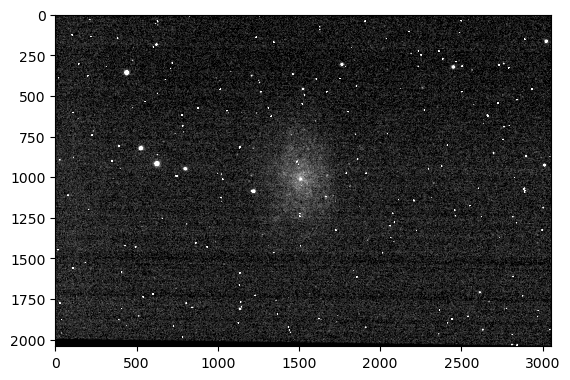

In [25]:
plt.imshow(hd189733_image[0].data, cmap = 'gray',  vmin=0, vmax=30)

(<matplotlib.patches.Ellipse at 0x1ac9b6bb170>,)

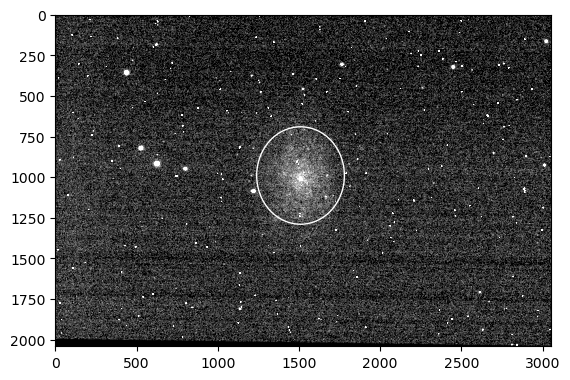

In [8]:
geometry = EllipseGeometry(x0=1510, y0=990, sma=300, eps=0.1,
                           pa=90.0 * np.pi / 180.0)

aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,
                          geometry.sma * (1 - geometry.eps),
                          geometry.pa)
plt.imshow(hd189733_image[0].data, cmap = 'gray',  vmin=0, vmax=20)
aper.plot(color='white')

(<matplotlib.patches.Ellipse at 0x2303b8ee600>,)

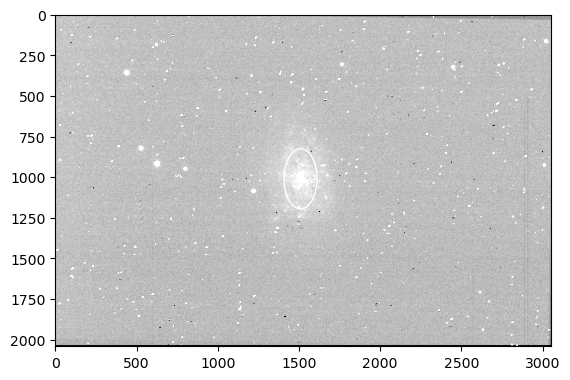

In [100]:
V= [r'C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 B\lco_data-20240926-14\lsc0m409-kb29-20201201-0141-e91.fits_affineremap.fits',
    r'C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 B\lco_data-20240926-14\lsc0m409-kb29-20201201-0144-e91.fits_affineremap.fits',
    r'C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 B\lco_data-20240926-14\lsc0m412-kb26-20190731-0288-e91.fits_affineremap.fits',
    r'C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 B\lco_data-20240926-14\lsc0m412-kb26-20190731-0291-e91.fits_affineremap.fits',
    r'C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 B\lco_data-20240926-14\lsc0m412-kb26-20201201-0074-e91.fits_affineremap.fits',
    r'C:\Users\HP Elitebook\isya2024\Roger Hajjar\NGC7793\NGC7793 B\lco_data-20240926-14\lsc0m412-kb26-20201201-0077-e91.fits_affineremap.fits']

    

v1= fits.open(V[0])
v2= fits.open(V[1])
v3= fits.open(V[2]) 
v4= fits.open(V[3])
v5= fits.open(V[4])
v6= fits.open(V[5])

image_concat_V = [v1[0].data,v2[0].data,v3[0].data,v4[0].data,v5[0].data,v6[0].data]
final_image_V = np.sum(image_concat_V, axis=0)





geometry = EllipseGeometry(x0=1510, y0=1010, sma=185, eps=0.45,
                           pa=90.0 * np.pi / 180.0)

aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,
                          geometry.sma * (1 - geometry.eps),
                          geometry.pa)
plt.imshow(final_image_V, cmap = 'gray',  vmin=100, vmax=350)
aper.plot(color='white')

In [101]:
from photutils.isophote import Ellipse
ellipse = Ellipse(final_image_V, geometry)

isolist = ellipse.fit_image()


In [102]:
print(isolist.pa)

[]


In [97]:
print(isolist.to_table())

sma intens intens_err ellipticity ... ndata nflag niter stop_code
                                  ...                            
--- ------ ---------- ----------- ... ----- ----- ----- ---------


In [ ]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(hspace=0.35, wspace=0.35)

plt.subplot(2, 2, 1)
plt.errorbar(isolist.sma, isolist.eps, yerr=isolist.ellip_err,
             fmt='o', markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('Ellipticity')

plt.subplot(2, 2, 2)
plt.errorbar(isolist.sma, isolist.pa / np.pi * 180.0,
             yerr=isolist.pa_err / np.pi * 80.0, fmt='o', markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('PA (deg)')

plt.subplot(2, 2, 3)
plt.errorbar(isolist.sma, isolist.x0, yerr=isolist.x0_err, fmt='o',
             markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('x0')

plt.subplot(2, 2, 4)
plt.errorbar(isolist.sma, isolist.y0, yerr=isolist.y0_err, fmt='o',
             markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('y0')

In [ ]:
from photutils.isophote import build_ellipse_model


model_image = build_ellipse_model(final_image_V.shape, isolist)
residual = final_image_V - model_image